In [2]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as ptl
import numpy as np
import statsmodels.api as sm
import seaborn 
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#!  mamba install seaborn=0.9.0-y
#!  mamba install matplotlib=3.4.3-y
#!  mamba install statsmodels=0.12.0-y

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
display(boston_df)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


Text(0.5, 1.0, 'Median value of owner ocupied homes')

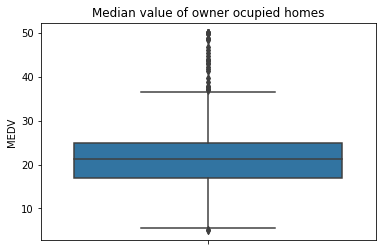

In [6]:
ax=seaborn.boxplot(y='MEDV', data=boston_df)
ptl.title('Median value of owner ocupied homes')

We see that the approximate median value of the homes is 22 (in thousands).  The minimum is about 4 and the maximum value is close to 40.  

Text(0.5, 1.0, 'Charles River Variable')

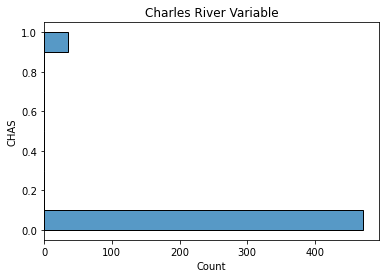

In [7]:
ax=seaborn.histplot(y='CHAS', data=boston_df)
ptl.title('Charles River Variable')

We see that there are about 50 houses that are bound by the Charles River and over 400 houses that are not bound by the Charles River. 

Text(0.5, 1.0, 'MEDV vs. AGE')

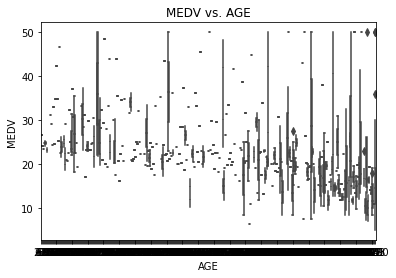

In [9]:
thirtyfive_lower = boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = '35 years and younger'
thirtyfive_seventy = boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 'between 35 and 70 years'
seventy_older = boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = '70 years and older'
ax=seaborn.boxplot(x='AGE', y='MEDV', data=boston_df)
ptl.title('MEDV vs. AGE')

Text(0.5, 1.0, 'NOX vs. non-retail acres per town')

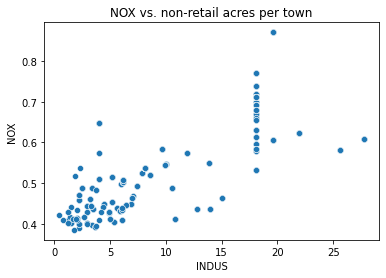

In [10]:
ax=seaborn.scatterplot(x='INDUS', y='NOX', data=boston_df)
ptl.title('NOX vs. non-retail acres per town')

We see that there is an upward sloping trend of increased Nitrus oxide concentrations and increasing non-retail business acres per town. 

Text(0.5, 1.0, 'Pupil to teacher ratio')

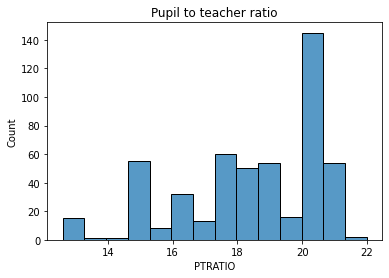

In [11]:
ax=seaborn.histplot(x='PTRATIO', data = boston_df)
ptl.title('Pupil to teacher ratio')

This is not a normal distribuition of the ratio and appears to have a longer left tail. 

H0:There is no significant difference between houses bounded by the Charles river
Ha: There is a significant difference between houses bounded by the charles river

In [13]:
scipy.stats.ttest_ind(boston_df[boston_df['MEDV'] == '1']['CHAS'],
                   boston_df[boston_df['MEDV'] == '0']['CHAS'], equal_var = True)


Ttest_indResult(statistic=nan, pvalue=nan)

Error in code?  No conclusion

H0: There is no difference in Median values of houses for each proportion of owner occupied units built prior to 1940
Ha: There is a difference in Median valudes of houses for each proportion of owner occupied units built prior to 1940

In [79]:
forty_lower_eval= boston_df[boston_df['AGE_group'] == '1940 years and younger']['MEDV']
fortyone_older_eval= boston_df[boston_df['AGE_group']=='1941 year and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(forty_lower_eval, fortyone_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: nan, P-Value: nan


H0: There is no correlation between Nitric Oxide concentrations and proportion of non-retail business acres per town
Ha: There is a correlation between Nitric Oxide concentrations and proportion of non-retail business acres per town

In [81]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

P-value is less than 0.05 so we reject the null hypothesis and there is a correlation between Nitric oxidd and business acres.  

In [85]:
## insert code here
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):                   1.52e-146
Time:                        20:28:58   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

H0: There is no impact on distance
Ha: There is an impact on distance
The P-value is less than 0.05 so we reject the null hypothesis and say there is an impact on distance.  The coefficient of 4.7985 Distance will increase the units of MEDV. 